In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import glob
import sys

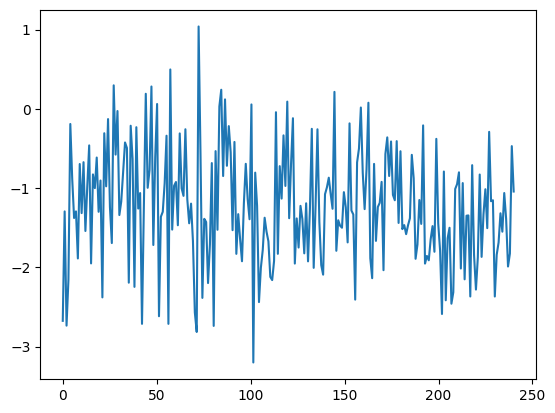

In [ ]:
file = glob.glob('/volumes/ssd/intern/25_summer/M101_L/sky_subed/pp*.fits')
mask_file = glob.glob('/volumes/ssd/intern/25_summer/M101_L/mask/*.fits')
m_list = []
for i in range(len(file)):
    hdu = fits.open(file[i])[0].data 
    mask = fits.open(mask_file[i])[0].data 
    masked_hdu = np.where(mask!=0, np.nan, hdu)
    median = np.nanmedian(masked_hdu)
    m_list.append(median)
y = np.array(m_list)
x = np.linspace(0,y.shape[0], y.shape[0])
plt.plot(x,y)
plt.show()

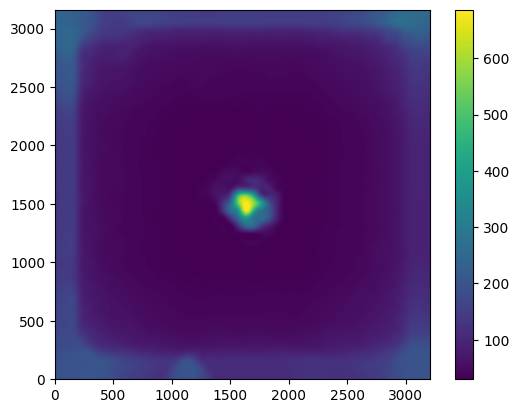

In [32]:
from photutils.background import MedianBackground, Background2D
import sep
hdu = fits.open('/volumes/ssd/intern/25_summer/M101_L/sky_subed/coadd.fits')[0].data 
mask = np.where(hdu!=0, False, True)
mean, median, std = sigma_clipped_stats(hdu, cenfunc='median', stdfunc='mad_std', sigma=3)
bkg_est = MedianBackground()
bkg_phot = Background2D(hdu,(64,64), bkg_estimator=bkg_est, mask=mask)
bkg_grms = np.nanmedian(bkg_phot.background_rms)
#print(bkg.globalrms, bkg_phot.background_rms)
#fits.writeto('/volumes/ssd/intern/25_summer/test_nan0.fits', hdu0)

#plt.imshow(hdu0, vmax=median+3*std,  vmin=median-3*std, origin='lower')
plt.imshow(bkg_phot.background_rms, origin='lower')
plt.colorbar()
plt.show()